In [40]:
import cv2
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [41]:
imgBGR = cv2.imread("Image.jpg")
imgRGB = imgBGR[:, :, [2, 1, 0]]

Text(0.5, 1.0, 'B')

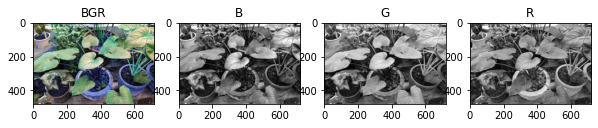

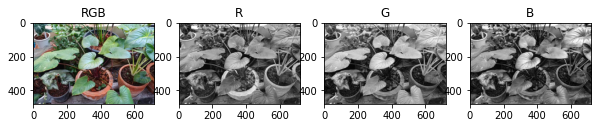

In [42]:
plt.figure(figsize=(10,4))
plt.subplot(2,4,1)
plt.imshow(imgBGR)
plt.title('BGR')
plt.subplot(2,4,2)
plt.imshow(imgBGR[:,:,0],cmap = "gray")
plt.title('B')
plt.subplot(2,4,3)
plt.imshow(imgBGR[:,:,1],cmap = "gray")
plt.title('G')
plt.subplot(2,4,4)
plt.imshow(imgBGR[:,:,2],cmap = "gray")
plt.title('R')


plt.figure(figsize=(10,4))
plt.subplot(2,4,1)
plt.imshow(imgRGB)
plt.title('RGB')
plt.subplot(2,4,2)
plt.imshow(imgRGB[:,:,0],cmap = "gray")
plt.title('R')
plt.subplot(2,4,3)
plt.imshow(imgRGB[:,:,1],cmap = "gray")
plt.title('G')
plt.subplot(2,4,4)
plt.imshow(imgRGB[:,:,2],cmap = "gray")
plt.title('B')


In [43]:
print(imgRGB.shape)

(481, 720, 3)


In [44]:
print(imgRGB)

[[[120 147 168]
  [114 141 162]
  [119 146 167]
  ...
  [247 246 216]
  [255 252 246]
  [255 250 254]]

 [[106 133 154]
  [103 130 151]
  [100 127 148]
  ...
  [253 251 228]
  [254 249 243]
  [255 253 255]]

 [[ 91 118 137]
  [ 97 124 143]
  [ 95 122 141]
  ...
  [255 255 243]
  [255 254 250]
  [249 243 243]]

 ...

 [[ 59  98  97]
  [ 64 103 102]
  [ 70 109 108]
  ...
  [ 83  83 107]
  [105 105 129]
  [108 108 132]]

 [[ 66 105 104]
  [ 70 109 108]
  [ 74 113 112]
  ...
  [ 67  67  91]
  [ 94  94 118]
  [ 95  95 119]]

 [[ 67 103 103]
  [ 72 108 108]
  [ 73 109 109]
  ...
  [ 82  82 106]
  [ 90  90 114]
  [ 84  84 108]]]


In [45]:
print(imgRGB[:,:,0])
print(imgRGB[:,:,1])
print(imgRGB[:,:,2])

[[120 114 119 ... 247 255 255]
 [106 103 100 ... 253 254 255]
 [ 91  97  95 ... 255 255 249]
 ...
 [ 59  64  70 ...  83 105 108]
 [ 66  70  74 ...  67  94  95]
 [ 67  72  73 ...  82  90  84]]
[[147 141 146 ... 246 252 250]
 [133 130 127 ... 251 249 253]
 [118 124 122 ... 255 254 243]
 ...
 [ 98 103 109 ...  83 105 108]
 [105 109 113 ...  67  94  95]
 [103 108 109 ...  82  90  84]]
[[168 162 167 ... 216 246 254]
 [154 151 148 ... 228 243 255]
 [137 143 141 ... 243 250 243]
 ...
 [ 97 102 108 ... 107 129 132]
 [104 108 112 ...  91 118 119]
 [103 108 109 ... 106 114 108]]


In [46]:
x = np.transpose(imgRGB)
print(x.shape)
print(x.swapaxes(1,2).shape)

(3, 720, 481)
(3, 481, 720)


In [47]:
from PIL import Image
def quantization(img,depth):
    im_pil = Image.fromarray(img)
    GrayImage = cv2.cvtColor(imgRGB,cv2.COLOR_RGB2GRAY)
    mode_to_bpp = {'1':1, 'L':8, 'P':8, 'RGB':24, 'RGBA':32, 'CMYK':32, 'YCbCr':24, 'I':32, 'F':32}
    bpp = mode_to_bpp[im_pil.mode]
    print(bpp)
    qLevel = 2**depth
    qStep = ((2**bpp)-1)/qLevel
    for i,row in enumerate(img):
        for j,dot in enumerate(row):
            img[i][j] = math.floor(img[i][j]/qStep)

In [48]:
GrayImage = cv2.cvtColor(imgRGB,cv2.COLOR_RGB2GRAY)
CGray = GrayImage.copy()
quantization(GrayImage,2);

8


Text(0.5, 1.0, 'GrayImage')

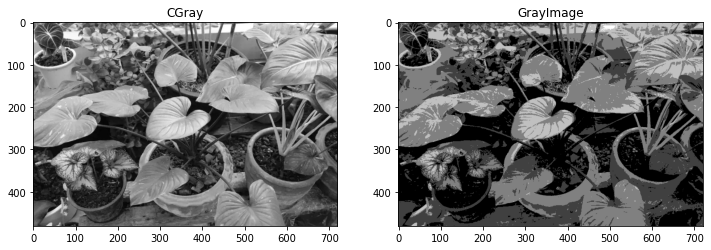

In [49]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1);
plt.imshow(CGray,cmap = 'gray')
plt.title('CGray')
plt.subplot(1,2,2);
plt.imshow(GrayImage,cmap = 'gray')
plt.title('GrayImage')

[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [478 478 478 ... 478 478 478]
 [479 479 479 ... 479 479 479]
 [480 480 480 ... 480 480 480]]
--------
[[  0   1   2 ... 717 718 719]
 [  0   1   2 ... 717 718 719]
 [  0   1   2 ... 717 718 719]
 ...
 [  0   1   2 ... 717 718 719]
 [  0   1   2 ... 717 718 719]
 [  0   1   2 ... 717 718 719]]
--------
[[120 114 119 ... 247 255 255]
 [106 103 100 ... 253 254 255]
 [ 91  97  95 ... 255 255 249]
 ...
 [ 59  64  70 ...  83 105 108]
 [ 66  70  74 ...  67  94  95]
 [ 67  72  73 ...  82  90  84]]
--------


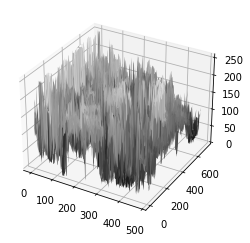

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xx,yy = np.mgrid[0:imgRGB.shape[0],0:imgRGB.shape[1]]
print(xx)
print("--------")
print(yy)
print("--------")
print(imgRGB[:,:,0])
print("--------")
ax.plot_surface(xx,yy,imgRGB[:,:,0],cmap = plt.cm.gray)
plt.show()